Data source: http://attributes.kyb.tuebingen.mpg.de

# Clustering animals with attributes

## 1. Load in the data set

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Load in animal names
f = open('6_animals_classes.txt')
lines = f.readlines()
names = []
for line in lines:
    (key,val) = line.split()
    names.append(val)
f.close()
print(names)

['antelope', 'grizzly+bear', 'killer+whale', 'beaver', 'dalmatian', 'persian+cat', 'horse', 'german+shepherd', 'blue+whale', 'siamese+cat', 'skunk', 'mole', 'tiger', 'hippopotamus', 'leopard', 'moose', 'spider+monkey', 'humpback+whale', 'elephant', 'gorilla', 'ox', 'fox', 'sheep', 'seal', 'chimpanzee', 'hamster', 'squirrel', 'rhinoceros', 'rabbit', 'bat', 'giraffe', 'wolf', 'chihuahua', 'rat', 'weasel', 'otter', 'buffalo', 'zebra', 'giant+panda', 'deer', 'bobcat', 'pig', 'lion', 'mouse', 'polar+bear', 'collie', 'walrus', 'raccoon', 'cow', 'dolphin']


In [3]:
# Load in attributes
f = open('6_animals_predicates.txt')
lines = f.readlines()
features = []
for line in lines:
    (key,val) = line.split()
    features.append(val)
f.close()
print(features)

['black', 'white', 'blue', 'brown', 'gray', 'orange', 'red', 'yellow', 'patches', 'spots', 'stripes', 'furry', 'hairless', 'toughskin', 'big', 'small', 'bulbous', 'lean', 'flippers', 'hands', 'hooves', 'pads', 'paws', 'longleg', 'longneck', 'tail', 'chewteeth', 'meatteeth', 'buckteeth', 'strainteeth', 'horns', 'claws', 'tusks', 'smelly', 'flys', 'hops', 'swims', 'tunnels', 'walks', 'fast', 'slow', 'strong', 'weak', 'muscle', 'bipedal', 'quadrapedal', 'active', 'inactive', 'nocturnal', 'hibernate', 'agility', 'fish', 'meat', 'plankton', 'vegetation', 'insects', 'forager', 'grazer', 'hunter', 'scavenger', 'skimmer', 'stalker', 'newworld', 'oldworld', 'arctic', 'coastal', 'desert', 'bush', 'plains', 'forest', 'fields', 'jungle', 'mountains', 'ocean', 'ground', 'water', 'tree', 'cave', 'fierce', 'timid', 'smart', 'group', 'solitary', 'nestspot', 'domestic']


In [4]:
# Load attribute matrix
x = np.loadtxt('Lecture_10a_animals_matrix.txt')

In [5]:
# Display matrix as dataframe
df = pd.DataFrame(x,columns=features)
df["Animal"]=names
df.head()

,black,white,blue,brown,gray,orange,red,yellow,patches,spots,...,tree,cave,fierce,timid,smart,group,solitary,nestspot,domestic,Animal
0,-1.00,-1.00,-1.0,-1.00,12.34,0.0,0.0,0.0,16.11,9.19,...,0.00,1.23,10.49,39.24,17.57,50.59,2.35,9.70,8.38,antelope
1,39.25,1.39,0.0,74.14,3.75,0.0,0.0,0.0,1.25,0.00,...,9.79,53.14,61.80,12.50,24.00,3.12,58.64,20.14,11.39,grizzly+bear
2,83.40,64.79,0.0,0.00,1.25,0.0,0.0,0.0,68.49,32.69,...,0.00,0.00,38.27,9.77,52.03,24.94,15.77,13.41,15.42,killer+whale
3,19.38,0.00,0.0,87.81,7.50,0.0,0.0,0.0,0.00,7.50,...,0.00,0.00,3.75,31.88,41.88,23.44,31.88,33.44,13.12,beaver
4,69.58,73.33,0.0,6.39,0.00,0.0,0.0,0.0,37.08,100.00,...,6.25,0.00,9.38,31.67,53.26,24.44,29.38,11.25,72.71,dalmatian


## 2. K-means clustering

In [6]:
# Change number of clusters and random_state

k = 15

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=k, random_state=10)
kmeans.fit(x)

clusters = []
for j in range(0,k):
    clusters.append([])
for i in range(0,50):
    clusters[kmeans.labels_[i]].append(names[i])

for j in range(0,k):
    print(j+1, clusters[j])

1 ['horse', 'moose', 'ox', 'sheep', 'buffalo', 'pig', 'cow']
2 ['tiger', 'leopard', 'lion']
3 ['killer+whale', 'seal', 'otter', 'walrus', 'dolphin']
4 ['beaver', 'squirrel', 'rabbit']
5 ['spider+monkey', 'gorilla', 'chimpanzee']
6 ['skunk', 'raccoon']
7 ['dalmatian', 'persian+cat', 'siamese+cat', 'chihuahua', 'collie']
8 ['german+shepherd', 'fox', 'wolf', 'rat', 'weasel', 'bobcat']
9 ['hippopotamus', 'elephant', 'rhinoceros']
10 ['blue+whale', 'humpback+whale']
11 ['grizzly+bear', 'polar+bear']
12 ['antelope', 'giraffe', 'zebra', 'deer']
13 ['giant+panda']
14 ['bat']
15 ['mole', 'hamster', 'mouse']


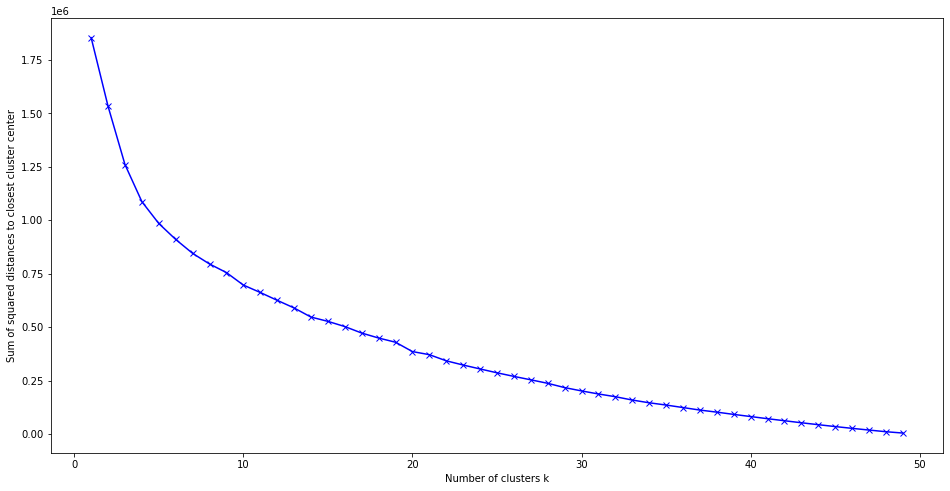

In [10]:
distortions = []
K = range(1,50)
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=10)
    kmeanModel.fit(x)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squared distances to closest cluster center')
plt.show()

## 3. Hierarchical clustering

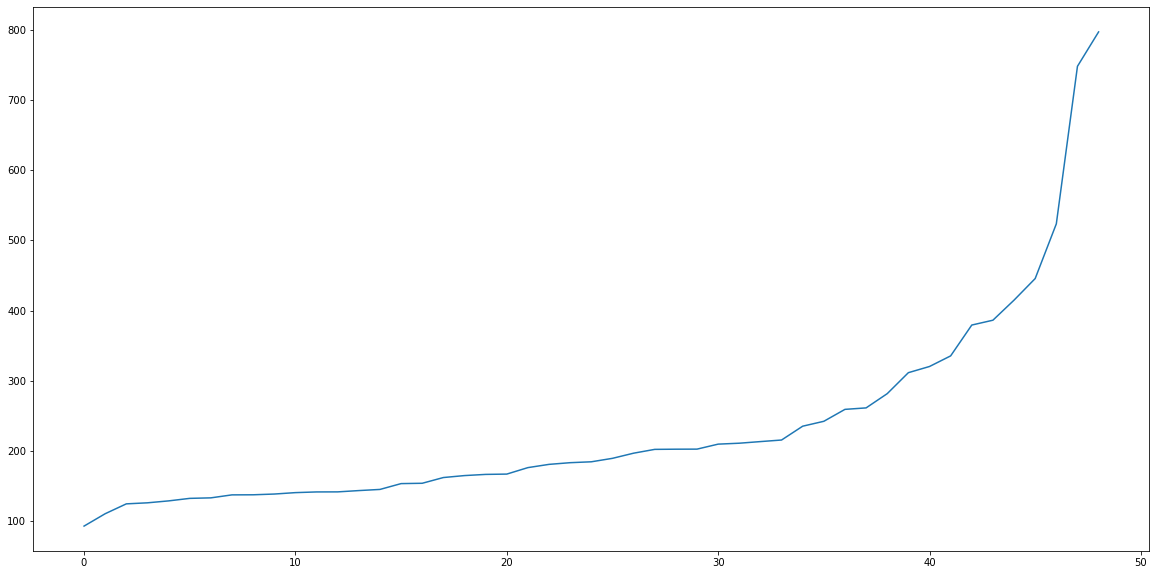

In [9]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=None,distance_threshold=0)
assignment = agg.fit_predict(x)
plt.figure(figsize=(20,10))
plt.plot(agg.distances_)

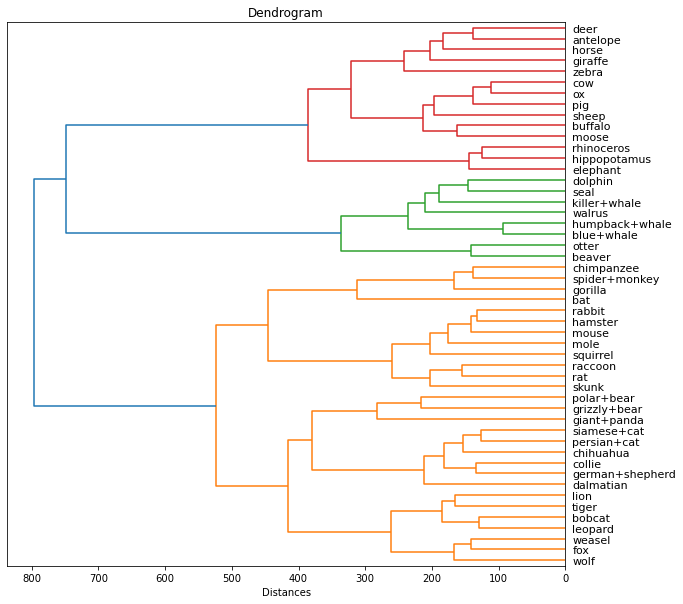

In [7]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
plt.figure(figsize=(10,10))
dendrogram = dendrogram(linkage(x, method  = "ward"),orientation="left", labels=names, leaf_font_size=11)
plt.title('Dendrogram')
plt.xlabel('Distances')
plt.show()

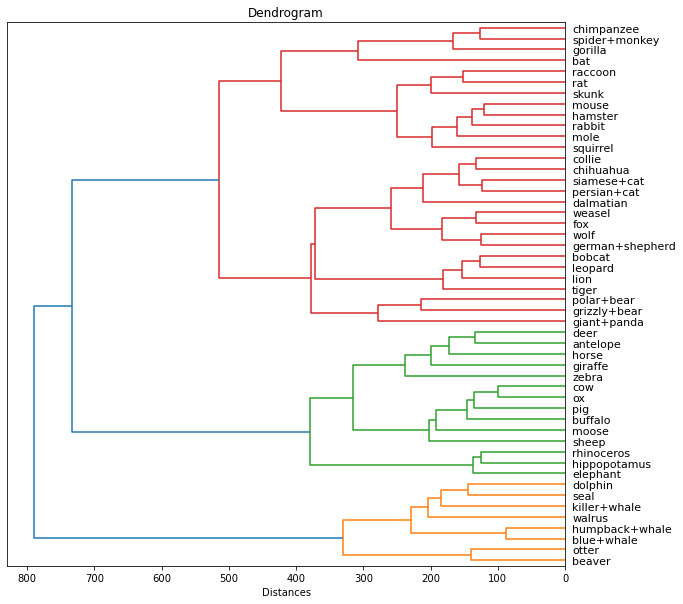

In [9]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
plt.figure(figsize=(10,10))
dendrogram = dendrogram(linkage(x[:,:80], method  = "ward"),orientation="left", labels=names, leaf_font_size=11)
plt.title('Dendrogram')
plt.xlabel('Distances')
plt.show()

## 4. Questions to ponder

Here are some things to think about:

<font color="magenta">Multiple runs of kmeans.</font>
The kmeans algorithm potentially returns a different solution each time it is run. Is there any reason to run it more than once? For instance, is there a sensible way of combining the information from several runs, of interpreting the similarities and differences?

<font color="magenta">Sensitivity to the choice of features.</font>
Both clustering methods are highly sensitive to the choice of features. How would you feel if the results changed dramatically when just one or two features were dropped? 

<font color="magenta">Criteria for success.</font>
This is clearly an application in which we are hoping that clustering will discover 'natural groups' in the data. To what extent do the algorithms succeed at this? Are the clusters mostly reasonable? Can we, in general, hope that tha clustering will perfectly capture what we want? Under what conditions would we be pleased with the clustering?